C:\Users\Pawani Chaudhary\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pawani Chaudhary\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


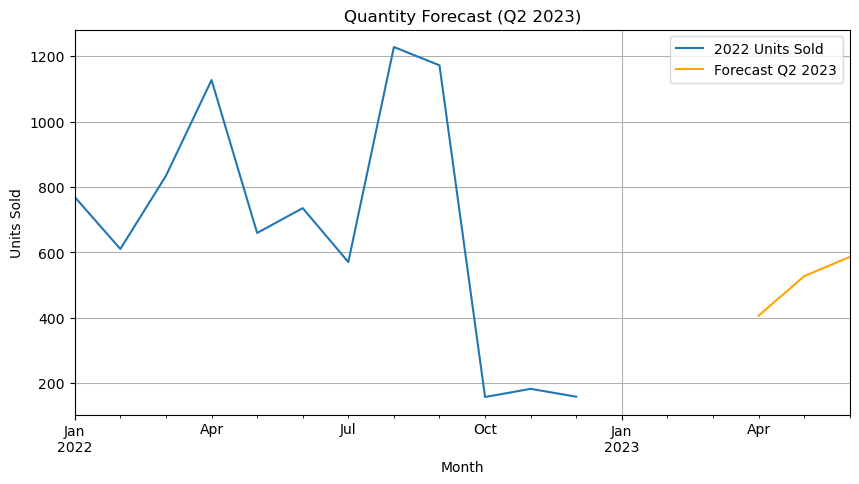

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load your Excel or CSV file
df = pd.read_csv(r"C:\Users\Pawani Chaudhary\Desktop\order_details.csv", parse_dates=['order_date'], dayfirst=True)

# Step 2: Filter 2022 data
df_2022 = df[(df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31')].copy()

# Step 3: Group by month and calculate total quantity sold
df_2022['month'] = df_2022['order_date'].dt.to_period('M')
monthly_qty = df_2022.groupby('month')['quantity'].sum().reset_index()
monthly_qty['month'] = monthly_qty['month'].astype(str)

# Step 4: Prepare time series
ts = monthly_qty.set_index('month')['quantity']
ts.index = pd.to_datetime(ts.index)
ts.index.freq = 'MS'

# Step 5: Fit ARIMA model
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

# Step 6: Forecast Q2 2023
forecast = model_fit.forecast(steps=3)
forecast.index = pd.date_range(start='2023-04-01', periods=3, freq='MS')

# Step 7: Plot actual vs forecasted quantity
ts.plot(label='2022 Units Sold', figsize=(10,5))
forecast.plot(label='Forecast Q2 2023', color='orange')
plt.title('Quantity Forecast (Q2 2023)')
plt.ylabel('Units Sold')
plt.xlabel('Month')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Export forecast to CSV or Excel
combined = pd.concat([ts, forecast])
combined.index.name = 'month'
combined.name = 'predicted_quantity'
combined.to_excel("Q2_2023_quantity_forecast.xlsx")
